In [1]:
import tensorflow as tf
import numpy as np

session = tf.InteractiveSession()

#=== step1
x = tf.constant(list(range(10)))
print(x.eval())

import resource
print("{} Kb".format(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss))

session.close()


[0 1 2 3 4 5 6 7 8 9]
85828 Kb


In [2]:
import numpy as np
session = tf.InteractiveSession()

X = tf.constant(np.eye(1000))
Y = tf.constant(np.random.randn(1000, 300))

print("{} Kb".format(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss))

Z = tf.matmul(X, Y)

Z.eval()

print("{} Kb".format(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss))

session.close()

99148 Kb
129888 Kb


(200, 550, 3)
<type 'numpy.ndarray'>
(200, 550, 3)
<type 'str'>
(550, 200)


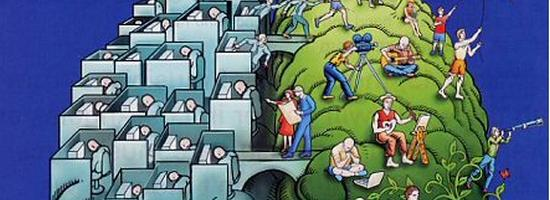

In [13]:
#=====  exercise
# %matplotlib inline
import tensorflow as tf

from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg

# First, load the image again
filename = "brain_left_right.jpg"
raw_image_data = Image.open(filename)
#raw_image_data = mpimg.imread(filename)

#===
image = tf.placeholder("uint8", [None, None, 3])
slice = tf.slice(image, [100, 0, 0], [200, -1, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(result.shape)


# read data from string
print(type(result))
print(result.shape)

bytes = result.tobytes()
print(type(bytes))

#slice , wh reverse
wh=(result.shape[1],result.shape[0])

im=Image.frombuffer('RGB', wh, bytes, 'raw',  'RGB', 0, 1)
ms = BytesIO()
im.save(ms, format = "JPEG")
ms.flush()
ms.seek(0)


im2 = Image.open(ms)
print(im2.size)
im2

#import matplotlib.pyplot as plt
#plt.imshow(im2)
#plt.show()